In [5]:
# Load & Explore the Data

import pandas as pd

# Load the dataset
df = pd.read_csv("Suicides in India 2001-2012.csv")

# Quick look at the structure
print(df.head())
print(df.info())


           State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender  

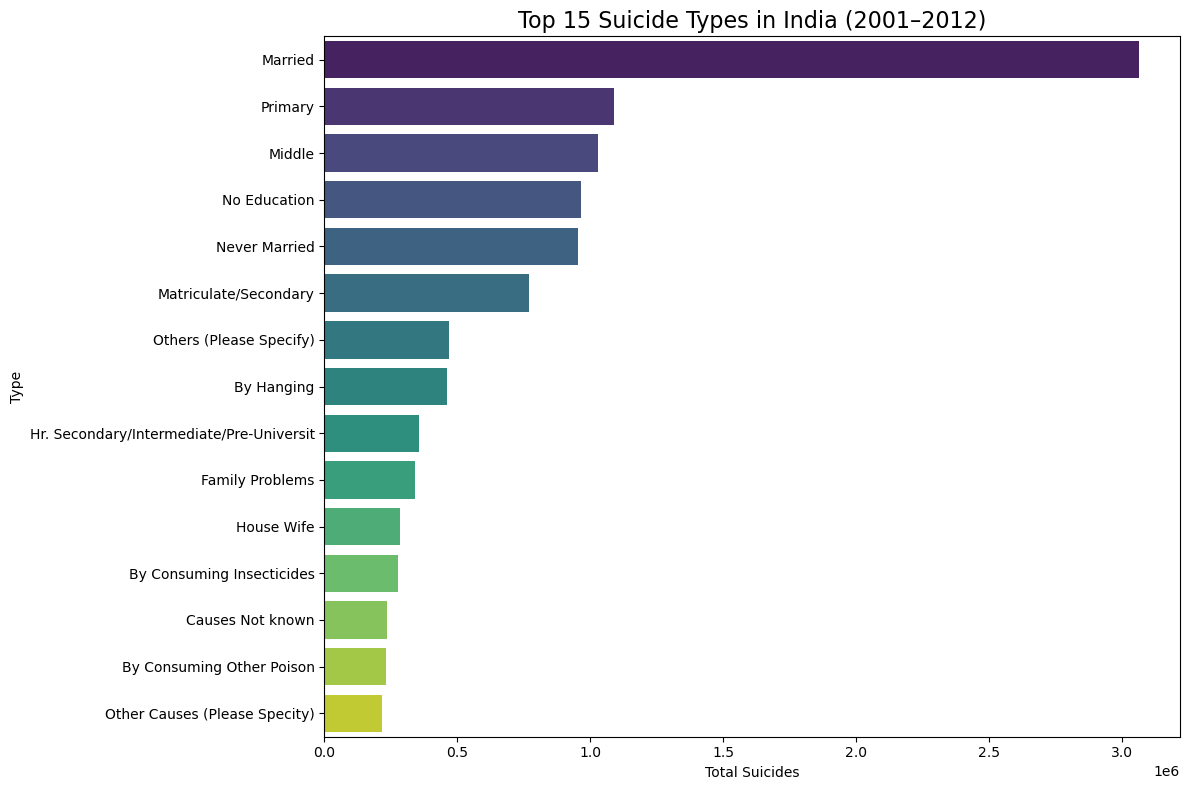

In [22]:
# Top 15 Suicide Types

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the data
top_types = (
    df.groupby("Type")["Total"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_types, x="Total", y="Type",hue = "Type", palette="viridis")
plt.title("Top 15 Suicide Types in India (2001–2012)", fontsize=16)
plt.xlabel("Total Suicides")
plt.ylabel("Type")
plt.tight_layout()
plt.show()


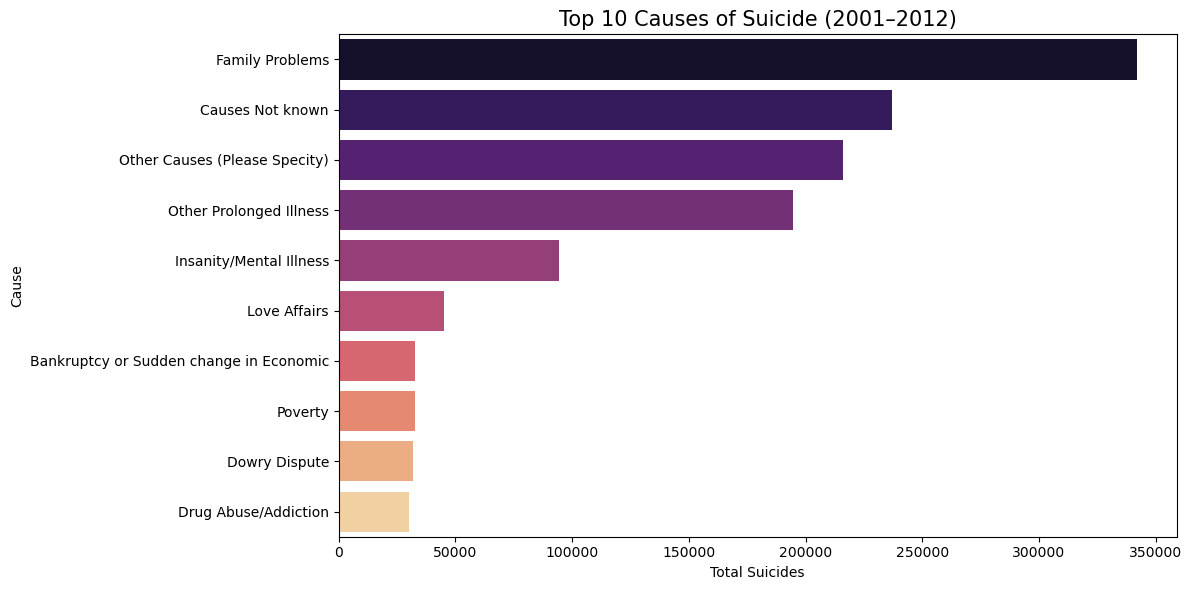

In [26]:
# Filter for Specific Type Categories 

causes = df[df["Type_code"] == "Causes"]

top_causes = (
    causes.groupby("Type")["Total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot causes
plt.figure(figsize=(12, 6))
sns.barplot(data=top_causes, x="Total", y="Type",hue = "Type", palette="magma")
plt.title("Top 10 Causes of Suicide (2001–2012)", fontsize=15)
plt.xlabel("Total Suicides")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()


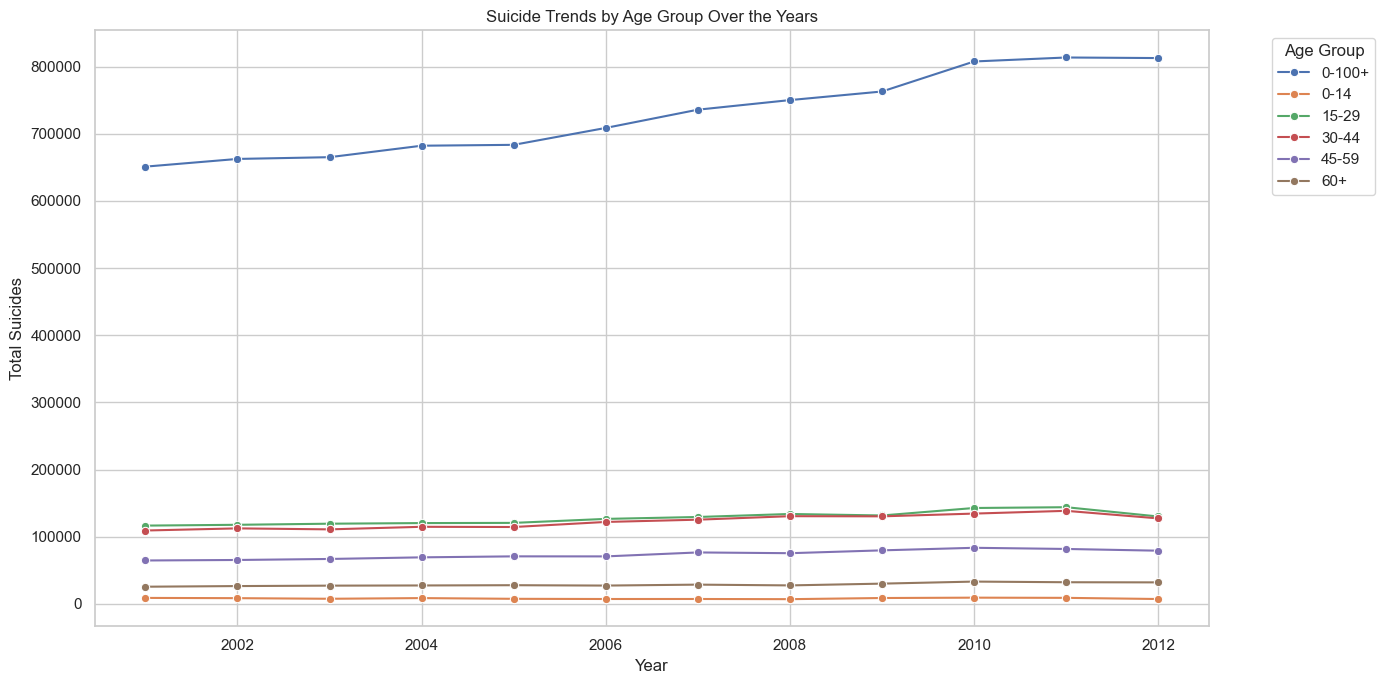

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 1. Age group trends over years
def plot_age_group_trends(df):
    age_year = df.groupby(["Year", "Age_group"])["Total"].sum().reset_index()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=age_year, x="Year", y="Total", hue="Age_group", marker="o")
    plt.title("Suicide Trends by Age Group Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Total Suicides")
    plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_age_group_trends(df)

C:\Users\kumar\AppData\Local\Temp\ipykernel_22096\2229947292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_data, x="Gender", y="Total", palette="pastel")


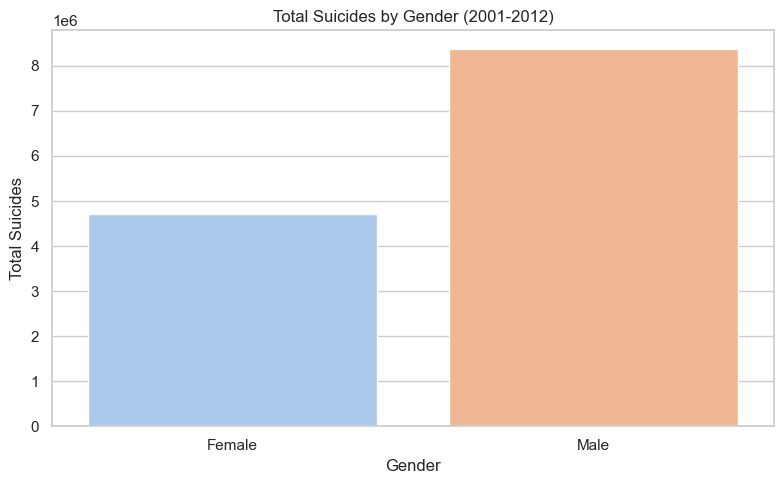

In [40]:
# 2. Gender-wise suicide count
def plot_gender_suicides(df):
    gender_data = df.groupby("Gender")["Total"].sum().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=gender_data, x="Gender", y="Total", palette="pastel")
    plt.title("Total Suicides by Gender (2001-2012)")
    plt.xlabel("Gender")
    plt.ylabel("Total Suicides")
    plt.tight_layout()
    plt.show()
plot_gender_suicides(df)


C:\Users\kumar\AppData\Local\Temp\ipykernel_22096\502022015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_data, x="Total", y="State", palette="rocket")


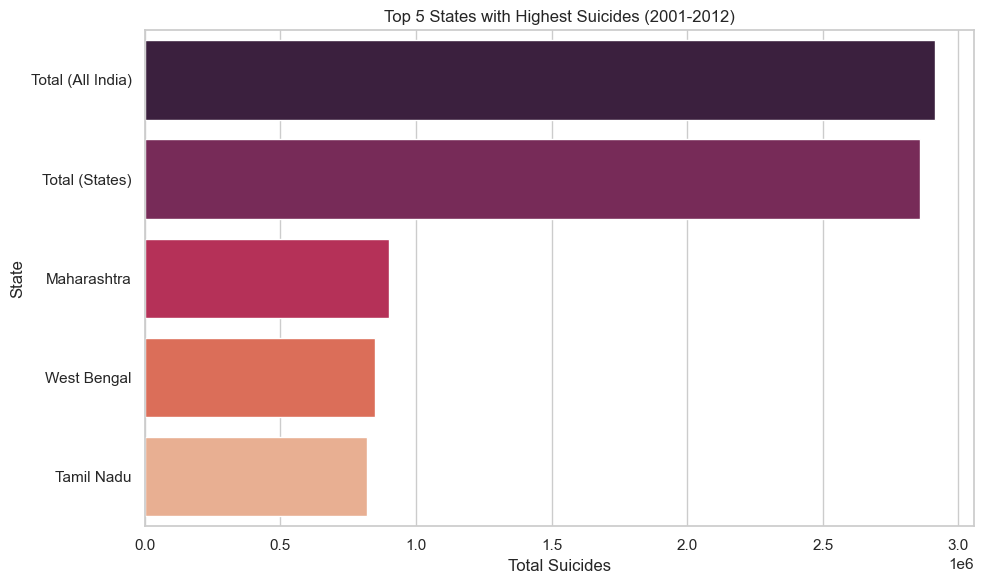

In [42]:
# 3. Top 5 states with highest suicides
def plot_top_states(df):
    state_data = df.groupby("State")["Total"].sum().reset_index().sort_values("Total", ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=state_data, x="Total", y="State", palette="rocket")
    plt.title("Top 5 States with Highest Suicides (2001-2012)")
    plt.xlabel("Total Suicides")
    plt.ylabel("State")
    plt.tight_layout()
    plt.show()

plot_top_states(df)


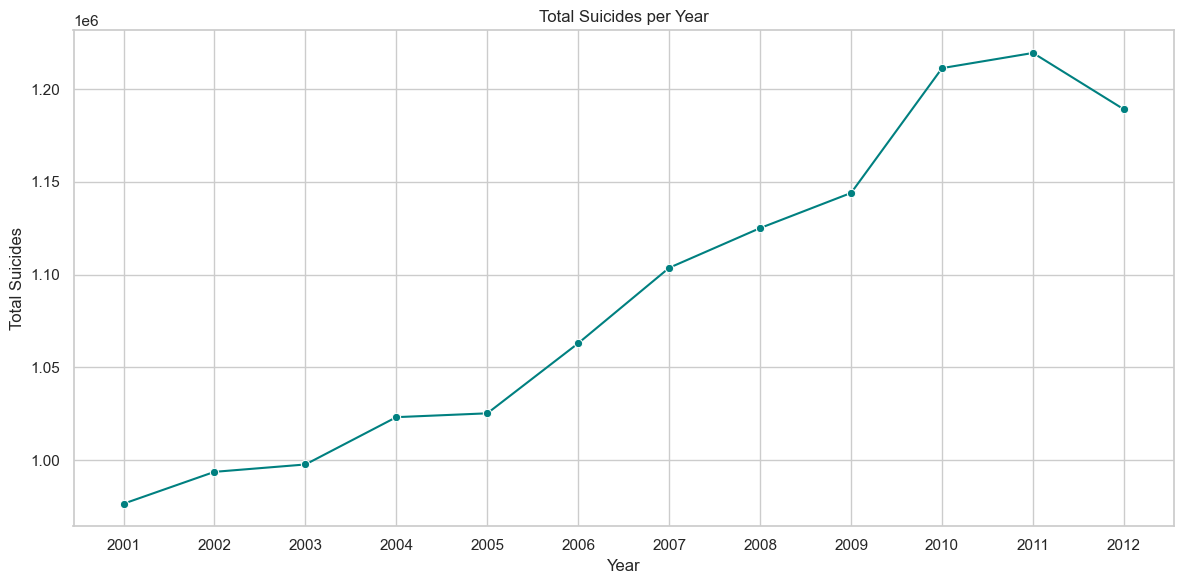

In [44]:

# 4. Total suicides by year
def plot_total_by_year(df):
    yearly = df.groupby("Year")["Total"].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=yearly, x="Year", y="Total", marker="o", color="teal")
    plt.title("Total Suicides per Year")
    plt.xlabel("Year")
    plt.ylabel("Total Suicides")
    plt.xticks(yearly["Year"])
    plt.tight_layout()
    plt.show()

plot_total_by_year(df)


C:\Users\kumar\AppData\Local\Temp\ipykernel_22096\2096212731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x="Total", y="Type", palette="viridis")


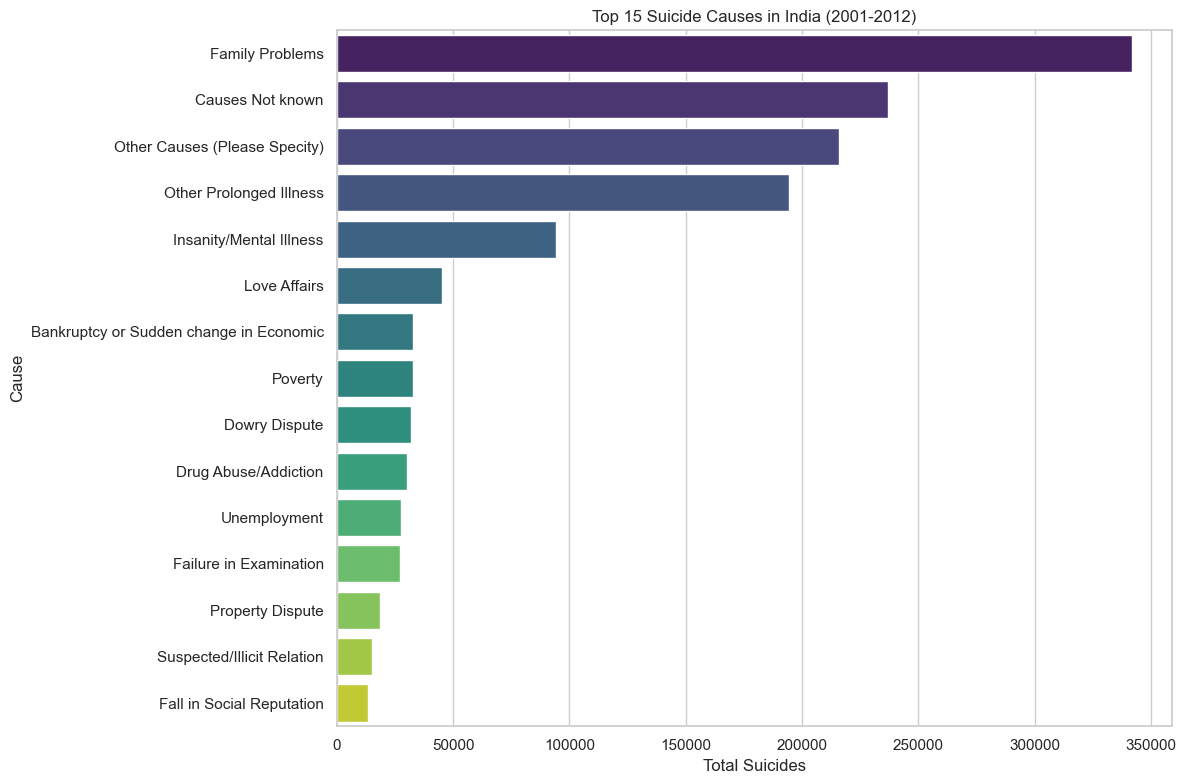

In [46]:


# 5. Top 15 suicide types (causes)
def plot_top_suicide_types(df):
    cause_data = df[df["Type_code"] == "Causes"].groupby("Type")["Total"].sum().reset_index()
    top_15 = cause_data.sort_values("Total", ascending=False).head(15)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_15, x="Total", y="Type", palette="viridis")
    plt.title("Top 15 Suicide Causes in India (2001-2012)")
    plt.xlabel("Total Suicides")
    plt.ylabel("Cause")
    plt.tight_layout()
    plt.show()

plot_top_suicide_types(df)

C:\Users\kumar\AppData\Local\Temp\ipykernel_22096\158119803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=method_data, x="Total", y="Type", palette="magma")


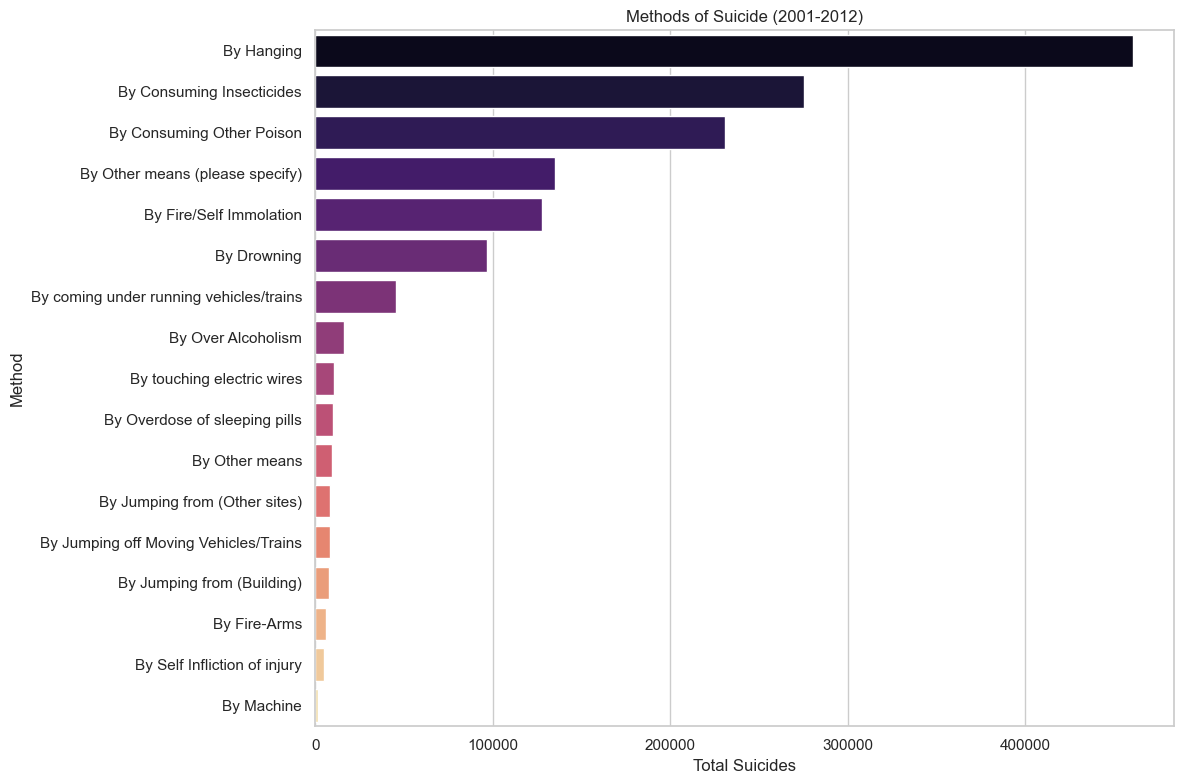

In [48]:
# 6. Methods of Suicide
def plot_methods_of_suicide(df):
    method_data = df[df["Type_code"] == "Means_adopted"].groupby("Type")["Total"].sum().reset_index()
    method_data = method_data.sort_values("Total", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=method_data, x="Total", y="Type", palette="magma")
    plt.title("Methods of Suicide (2001-2012)")
    plt.xlabel("Total Suicides")
    plt.ylabel("Method")
    plt.tight_layout()
    plt.show()

plot_methods_of_suicide(df)